In [3]:
!pip install ultralytics

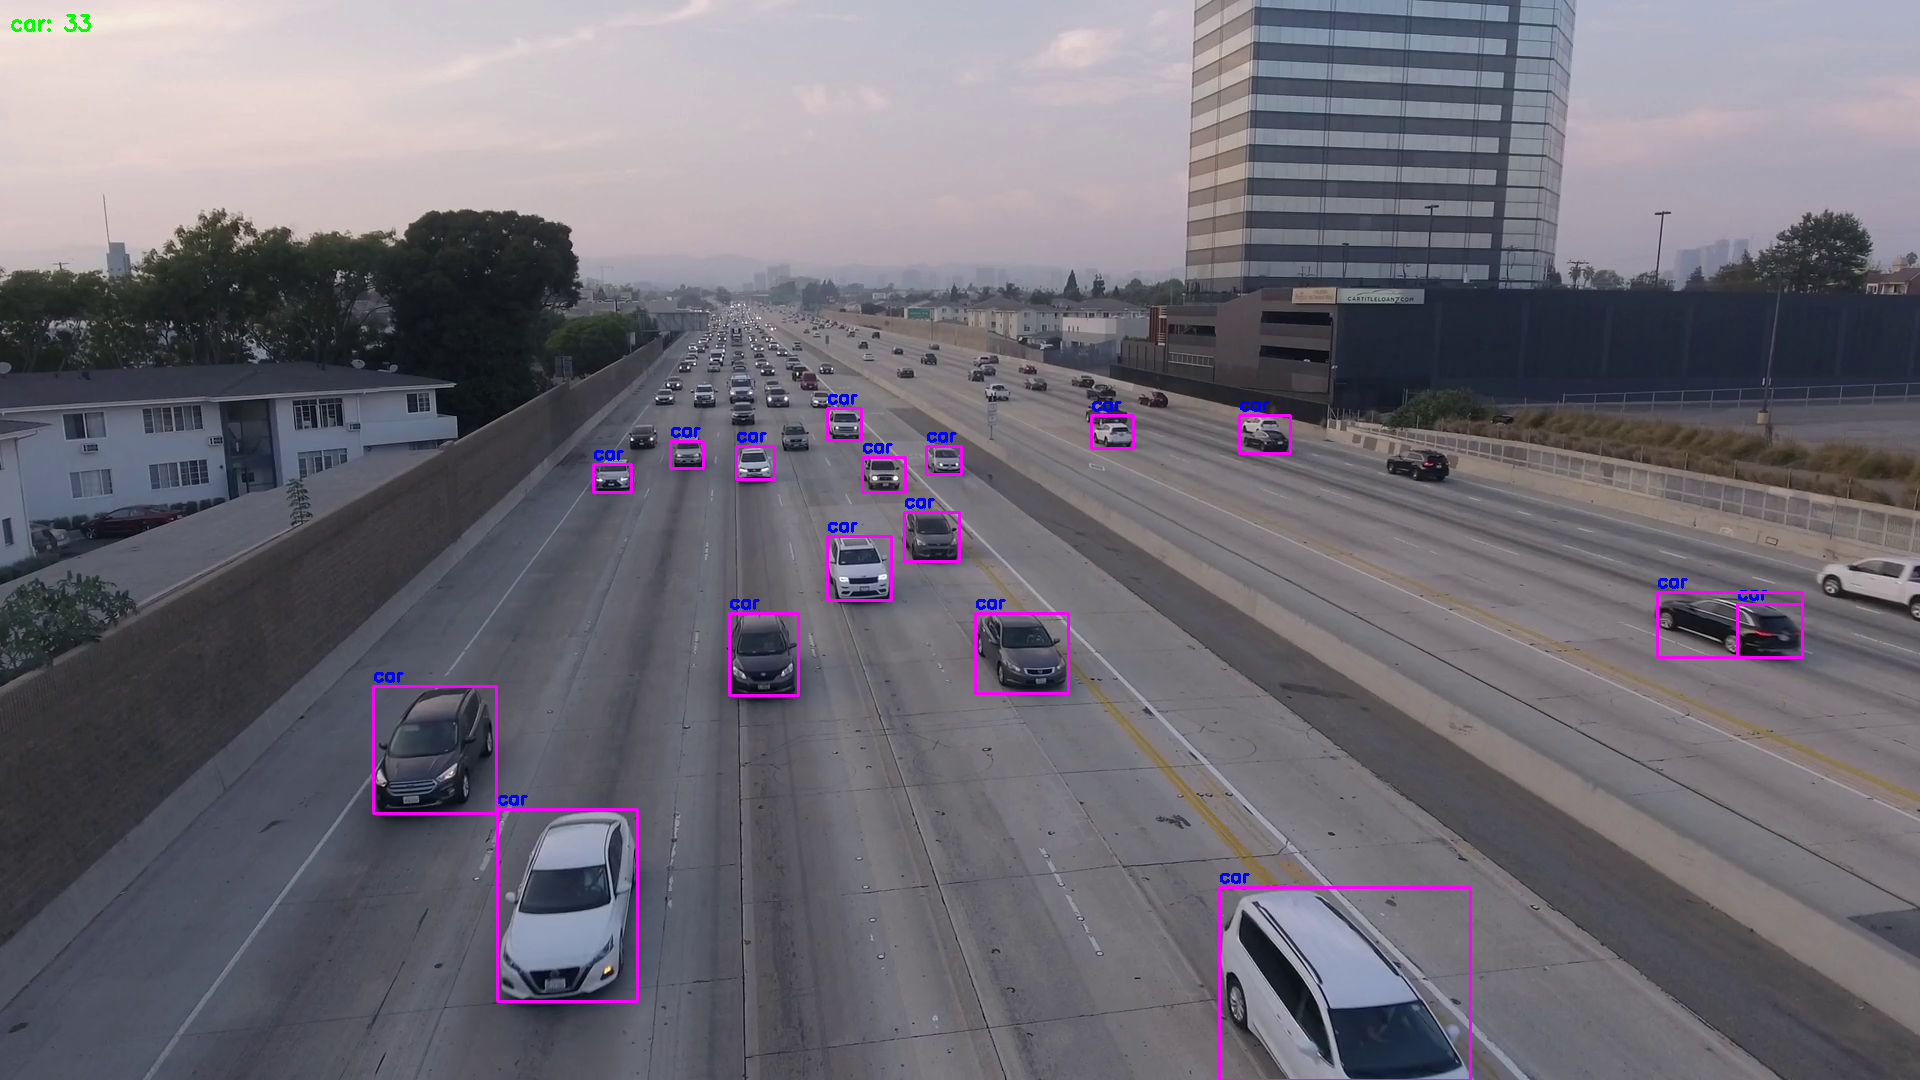

KeyboardInterrupt: 

In [2]:
import cv2
import pandas as pd
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import time

# Load YOLO model
model = YOLO("yolov8n.pt")
classNames = model.names

# Initialize with one empty row
detected_class = pd.DataFrame([{}])

cap = cv2.VideoCapture("los_angeles.mp4")

while cap.isOpened():
    success, im = cap.read()
    if not success:
        break

    result = model.predict(im, stream=True)

    for r in result:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            cv2.rectangle(im, (x1, y1), (x2, y2), (255, 0, 255), 2)

            cla = int(box.cls[0])
            class_name = classNames[cla]

            if class_name not in detected_class.columns:
                detected_class[class_name] = 0

            detected_class.at[0, class_name] += 1

            cv2.putText(im, class_name, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                        0.6, (255, 0, 0), 2)

    # Show total counts
    y_offset = 30
    for cls in detected_class.columns:
        count = detected_class.at[0, cls]
        cv2.putText(im, f"{cls}: {count}", (10, y_offset),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        y_offset += 25

    # Clear previous frame and display new one → makes it look like a live stream
    clear_output(wait=True)
    cv2_imshow(im)
    time.sleep(0.03)  # ~30 FPS

cap.release()


In [4]:
import cv2
import pandas as pd
from ultralytics import YOLO

# Load YOLO model
model = YOLO("yolov8n.pt")
classNames = model.names

# Initialize with one empty row
detected_class = pd.DataFrame([{}])

# Open input video
cap = cv2.VideoCapture("los_angeles.mp4")

# Define output video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec
out = cv2.VideoWriter(
    "output_vdo.mp4",
    fourcc,
    cap.get(cv2.CAP_PROP_FPS),
    (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
     int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
)

while cap.isOpened():
    success, im = cap.read()
    if not success:
        break

    result = model.predict(im, stream=True)

    for r in result:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            # Draw bounding box
            cv2.rectangle(im, (x1, y1), (x2, y2), (255, 0, 255), 2)

            cla = int(box.cls[0])
            class_name = classNames[cla]

            # Initialize column if not present
            if class_name not in detected_class.columns:
                detected_class[class_name] = 0

            # Increment count
            detected_class.at[0, class_name] += 1

            # Put class label
            cv2.putText(im, class_name, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                        0.6, (255, 0, 0), 2)

    # Display total count at top-left
    y_offset = 30
    for cls in detected_class.columns:
        count = detected_class.at[0, cls]
        cv2.putText(im, f"{cls}: {count}", (10, y_offset),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        y_offset += 25

    # Write the processed frame into the output file
    out.write(im)

cap.release()
out.release()

print("Video saved as output.mp4")



0: 384x640 16 cars, 142.9ms
Speed: 4.3ms preprocess, 142.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 cars, 148.8ms
Speed: 6.0ms preprocess, 148.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 cars, 147.0ms
Speed: 6.5ms preprocess, 147.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 cars, 1 truck, 156.3ms
Speed: 8.2ms preprocess, 156.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 cars, 161.0ms
Speed: 3.9ms preprocess, 161.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 cars, 1 bus, 144.1ms
Speed: 4.0ms preprocess, 144.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 cars, 1 truck, 152.7ms
Speed: 3.6ms preprocess, 152.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 cars, 1 truck, 145.5ms
Speed: 6.7ms preprocess, 145.5ms inference, 2.9m